In [1]:
# Importing the requied Libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats


pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
# Read the Dataframe
df = pd.read_csv('final_data.csv')

In [3]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown,0
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown,0
3,3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown,0
4,4,33,unknown,single,secondary,no,1,no,no,unknown,5,may,198,1,0,0,unknown,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
Unnamed: 0    45211 non-null int64
age           45211 non-null int64
job           45211 non-null object
marital       45211 non-null object
education     45211 non-null object
default       45211 non-null object
balance       45211 non-null int64
housing       45211 non-null object
loan          45211 non-null object
contact       45211 non-null object
day           45211 non-null int64
month         45211 non-null object
duration      45211 non-null int64
campaign      45211 non-null int64
pdays         45211 non-null int64
previous      45211 non-null int64
poutcome      45211 non-null object
y             45211 non-null int64
dtypes: int64(9), object(9)
memory usage: 6.2+ MB


## Feature Engineering

In [5]:
data = df.copy()


In [6]:

data['education']=data['education'].replace('unknown','secondary')
data['pdays']=data['pdays'].replace(-1,0)


In [7]:
X = data.drop(columns = ['y','Unnamed: 0'],axis = 1)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,0,unknown
3,47,blue-collar,married,secondary,no,1506,yes,no,unknown,5,may,92,1,0,0,unknown
4,33,unknown,single,secondary,no,1,no,no,unknown,5,may,198,1,0,0,unknown


In [8]:
Xd= pd.get_dummies(X)
Xd.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [9]:
y = data['y']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### Scaling the numerical features:

In [10]:
# Scaling of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xd_sc = sc.fit_transform(Xd)

In [11]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import log_loss


In [16]:

#Lets use train_test_split to split X and y into train and test 
X_train, X_test, y_train, y_test = train_test_split(Xd_sc, y, test_size = 0.3, random_state = 100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31647, 50) (13564, 50) (31647,) (13564,)


In [17]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier().fit(X_train,y_train)

In [18]:
print(classifier.feature_importances_)

[0.08434907 0.08426218 0.08640182 0.22611542 0.0567257  0.02441787
 0.017466   0.01094347 0.0099851  0.00481709 0.00409613 0.01216709
 0.00707117 0.00577558 0.00794143 0.00566426 0.01272628 0.00578431
 0.00204965 0.00837236 0.01143454 0.01042108 0.00780828 0.01268011
 0.01167674 0.00143016 0.00142465 0.01216154 0.01031638 0.00616982
 0.00669468 0.00960341 0.00521503 0.01107885 0.01383246 0.00956186
 0.00452729 0.00794785 0.0051628  0.00838836 0.0121618  0.01196414
 0.0086353  0.00782933 0.01178084 0.00976185 0.00937425 0.00578922
 0.06303076 0.01500464]


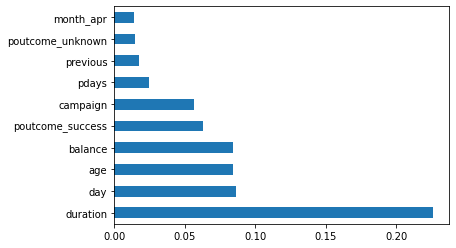

In [19]:
feature_imp = pd.Series(classifier.feature_importances_, index = Xd.columns)
feature_imp.nlargest(10).plot(kind = 'barh')
plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier #clasification tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import ShuffleSplit

In [43]:
classification_algos_name = ["SVC", "KNeighborsClassifier", "GaussianNB", 
                              "LogisticRegression", "DecisionTreeClassifier", 
                             "RandomForestClassifier", "AdaBoostClassifier"]#,
                            #"GradientBoostingClassifier"]

In [22]:
classification_algos=[SVC(), KNeighborsClassifier(), GaussianNB(),
                      LogisticRegression(), 
                      DecisionTreeClassifier(), RandomForestClassifier(),
                      AdaBoostClassifier()] #,GradientBoostingClassifier()]

In [23]:
accuracy_score_list = []
for mod in classification_algos:
    model = mod
    model.fit(X_train, y_train)
    y_pred_all = model.predict(X_test)
    accuracy_score_list.append(accuracy_score(y_test,y_pred_all))
for idx,i in enumerate(accuracy_score_list):
    print(classification_algos_name[idx]," ",i)

SVC   0.9029047478619876
KNeighborsClassifier   0.8909613683279268
GaussianNB   0.8434090238867591
LogisticRegression   0.8997345915659097
DecisionTreeClassifier   0.8774697729283397
RandomForestClassifier   0.9062223532881156
AdaBoostClassifier   0.8972279563550575


In [25]:
from bokeh.io import output_notebook
data = pd.DataFrame({"algorithms": classification_algos_name, "accuracy_score": accuracy_score_list})
data['color'] = ['#440154', '#404387', '#29788E', '#22A784', '#79D151', '#FDE724','#30678D']
output_notebook()

Loading BokehJS ...

In [26]:
from bokeh.io import show, output_file
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.palettes import Spectral6
from bokeh.transform import factor_cmap

source = ColumnDataSource(data=data)

p = figure(x_range=data['algorithms'],
           y_range=(0,1),
           plot_width = 800,
           plot_height = 600,
           title = "Comparison",
           tools="hover",
           tooltips="@algorithms: @accuracy_score")
p.vbar(x='algorithms', top='accuracy_score',color= 'color',
       width=0.95, source=source)

p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 120
output_file('comparison.html')
show(p)

### Balancing the Data

In [12]:
import imblearn
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [13]:
x_resmaple,y_resample = SMOTE().fit_resample(Xd_sc,y)

In [14]:
np.savez('Hist.npz',x_resmaple,y_resample)

In [15]:
df_over = np.load('Hist.npz')
df_over.files

['arr_0', 'arr_1']

In [16]:
x_over = df_over['arr_0']
y_over = df_over['arr_1']

In [17]:
np.random.seed(1001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.2)

In [33]:
accuracy_score_list = []
for mod in classification_algos:
    model = mod
    model.fit(x_train, y_train)
    y_pred_all = model.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test,y_pred_all))
for idx,i in enumerate(accuracy_score_list):
    print(classification_algos_name[idx]," ",i)

SVC   0.903500532281295
KNeighborsClassifier   0.9101383931367023
GaussianNB   0.7275972196130002
LogisticRegression   0.8463898803932619
DecisionTreeClassifier   0.9115786836996681
RandomForestClassifier   0.9456446865802492
AdaBoostClassifier   0.8880330640616194


**After doing class imbalance to class balance using `SMOTE` we get 94.5% in `RandomForest Classifier`**

In [19]:
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.941636921535475

Text(24.0, 0.5, 'True Values')

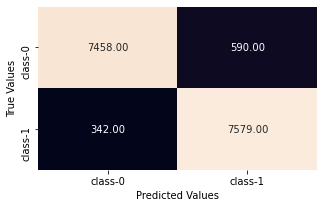

In [23]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (5,3))

sns.heatmap(cm,annot = True,fmt = '0.2f',xticklabels=['class-0','class-1'],
           yticklabels=['class-0','class-1'],cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')

In [24]:
kappa = cohen_kappa_score(y_test,y_pred) # Kappa Score
print('Kappa Score =',kappa)

print('\n'+'*'*30+'Area Under Curve Score'+'*'*30+'\n\n')
# AUC score
roc_a = roc_auc_score(y_test,y_pred) # Kappa Score
print('AUC Score =',roc_a)

Kappa Score = 0.883295289897007

******************************Area Under Curve Score******************************


AUC Score = 0.941756747107307


In [28]:
y_prob_log= classifier.predict_proba(x_test)

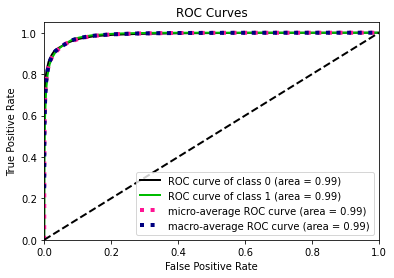

In [29]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,y_prob_log)
plt.show()


In [ ]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(x_train, y_train)

In [ ]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=15, random_state=0), x_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

In [31]:
import pickle
# Creating a pickle file for the classifier
filename = 'Bank-subscription-prediction-rfc-model.pkl'
pickle.dump(classifier, open(filename, 'wb'))